# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

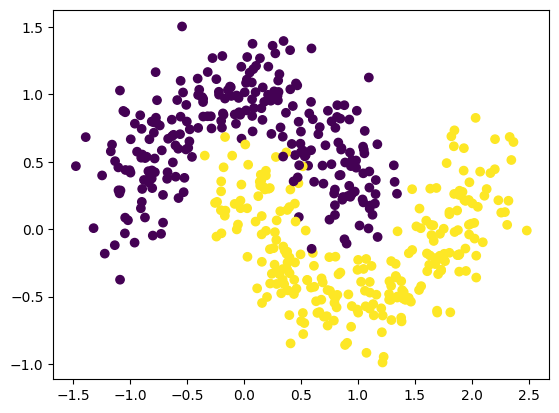

In [103]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

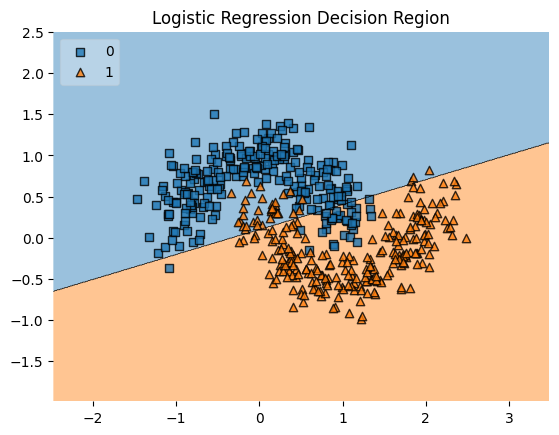

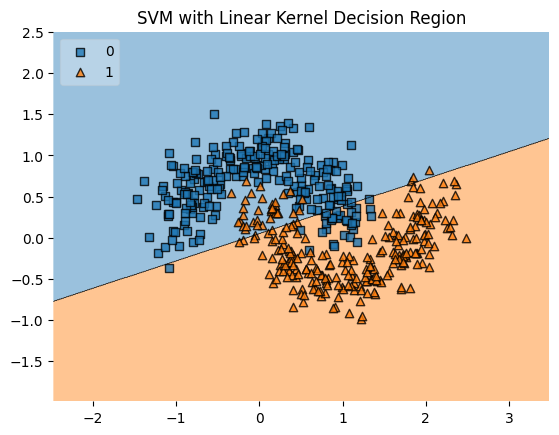

Logistic Regression Accuracy: 0.856
SVM with Linear Kernel Accuracy: 0.858


In [104]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lr = LogisticRegression(penalty = "l2", max_iter=1000)
svm = SVC(kernel="linear", max_iter=1000)

### YOUR CODE HERE

# Train the models
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

def plot_decisions(X, y, estimator, title):
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

# Plot decision regions for Logistic Regression and SVM with linear kernel
plot_decisions(moons_points, moons_labels, lr, "Logistic Regression Decision Region")
plot_decisions(moons_points, moons_labels, svm, "SVM with Linear Kernel Decision Region")

# Predict on the training data
y_pred_lr = lr.predict(moons_points)
y_pred_svm = svm.predict(moons_points)

# Calculate accuracy
accuracy_lr = accuracy_score(moons_labels, y_pred_lr)
accuracy_svm = accuracy_score(moons_labels, y_pred_svm)

print(f"Logistic Regression Accuracy: {accuracy_lr:.3f}")
print(f"SVM with Linear Kernel Accuracy: {accuracy_svm:.3f}")

### Description  
Both Logistic Regression and SVM with a linear kernel perform well on this dataset, achieving high accuracy scores.
The decision boundaries are linear for both models, but SVM's  may result potentially more robust boundary.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

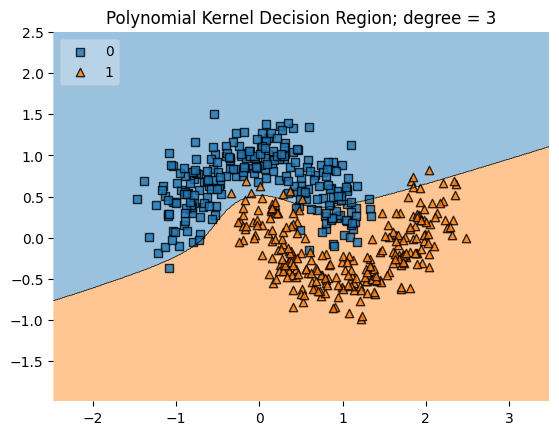

Polynomial Kernel Decision Region; degree = 3: 0.906


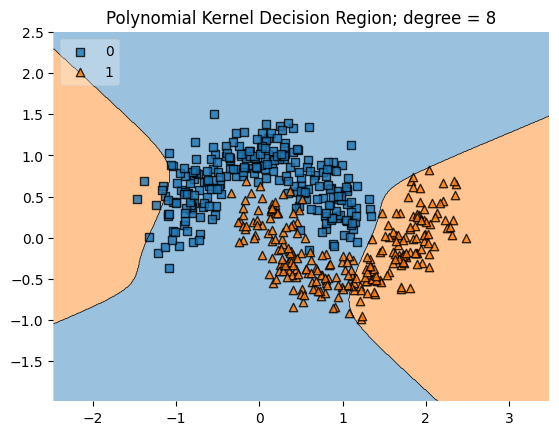

Polynomial Kernel Decision Region; degree = 8: 0.722


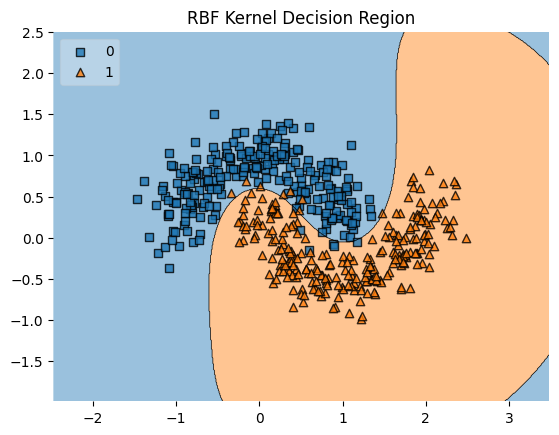

RBF Kernel Decision Region: 0.974


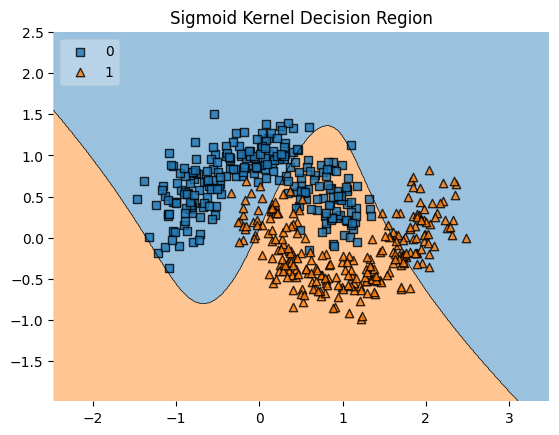

Sigmoid Kernel Decision Region: 0.648


In [105]:
### YOUR CODE HERE

# SVM models with different kernels
models = {
    "Polynomial Kernel Decision Region; degree = 3": SVC(kernel='poly', degree=3),
    "Polynomial Kernel Decision Region; degree = 8": SVC(kernel='poly', degree=8),
    "RBF Kernel Decision Region": SVC(kernel='rbf'),
    "Sigmoid Kernel Decision Region": SVC(kernel='sigmoid'),
}

for title, model in models.items():
    model.fit(moons_points, moons_labels) 
    plot_decisions(moons_points, moons_labels, model, title)

    y_pred = model.predict(moons_points)
    accuracy = accuracy_score(moons_labels, y_pred)
    print(f"{title}: {accuracy:.3f}")

### Analyzing  

Classification quality:  
- RBF kernel provides the best classification quality. It handles nonlinear dependencies efficiently. The polynomial kernel can also perform well if the degree is chosen correctly.

Decision Boundaries:  
- The decision boundary is non-linear and can reflect complex shapes in the data. In the case of poly it is highly dependent on the degree.

Degree parameter:  
- For the polynomial kernel, degree 3 was chosen as showing the best results. If the degree is increased, the kernel is oversampled and as a consequence, the worst results are obtained. For the other kernels the degree does not matter.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

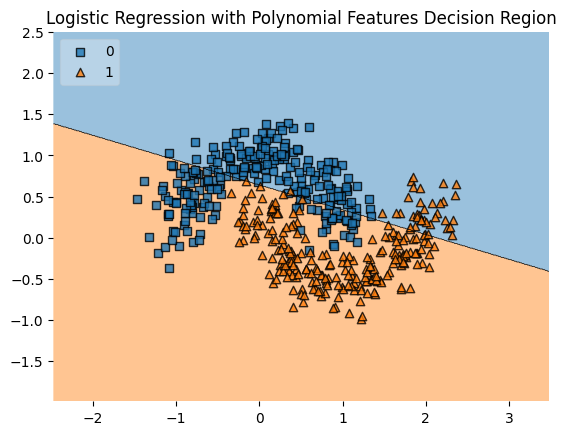

Logistic Regression with Polynomial Features Accuracy: 0.968


In [106]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(moons_points)

# Train Logistic Regression on the new feature set
logistic_regression_poly = LogisticRegression(max_iter=1000)
logistic_regression_poly.fit(X_poly, moons_labels)

feature_values = {i: 0 for i in range(3, X_poly.shape[1])}
feature_width = {i: np.max(X_poly[:, i]) for i in range(3, X_poly.shape[1])}
feature_values[0], feature_width[0] = 1, 1

plot_decision_regions(X_poly, moons_labels, clf=logistic_regression_poly, legend=2, feature_index=(1, 2),
                      filler_feature_values=feature_values, filler_feature_ranges=feature_width)
plt.title("Logistic Regression with Polynomial Features Decision Region")
plt.show()

# Predict on the training data
labels_pred_poly = logistic_regression_poly.predict(X_poly)

# Calculate accuracy
accuracy_poly = accuracy_score(moons_labels, labels_pred_poly)

print(f"Logistic Regression with Polynomial Features Accuracy: {accuracy_poly:.3f}")

#### Answers

Comare SVM's results with this solution (quality, borders type)
- By adding features it is possible to significantly increase LR accuracy and get closer to the RBF kernel, whose provides the best classification quality. But the boundary is much more accurately represented in RBF because it is nonlinear.

What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.
- I used degree 3 as it is vastly superior to degree 2. (accuracy 0.968 vs 0.860). It's also superior SVM model with Polynomial Kernel Decision Region with degree = 3. (accyracy = 0.906)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

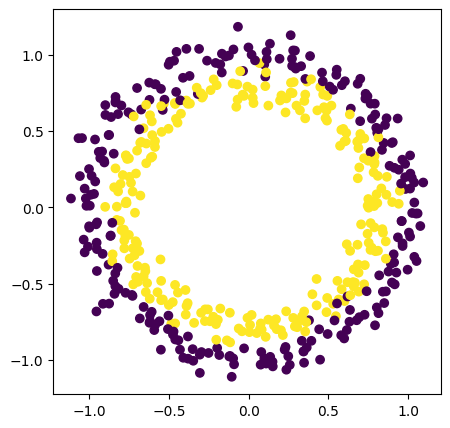

In [107]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

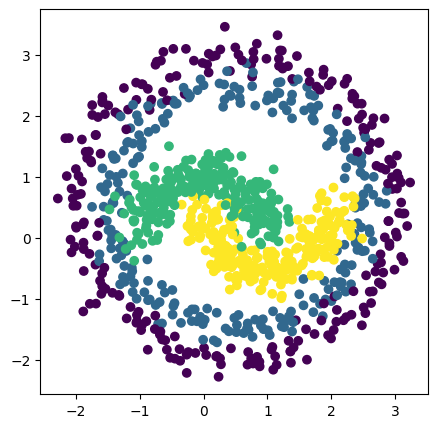

In [108]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/home/denis/.local/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


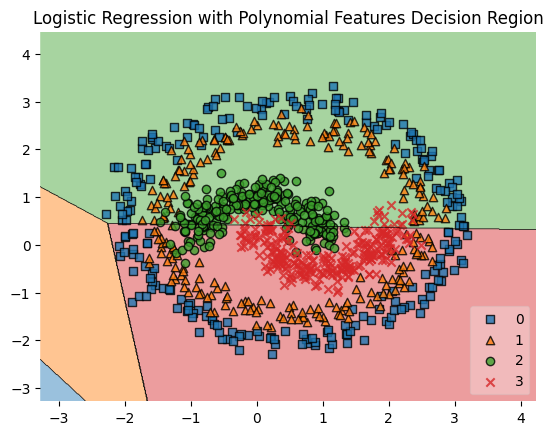

/home/denis/.local/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


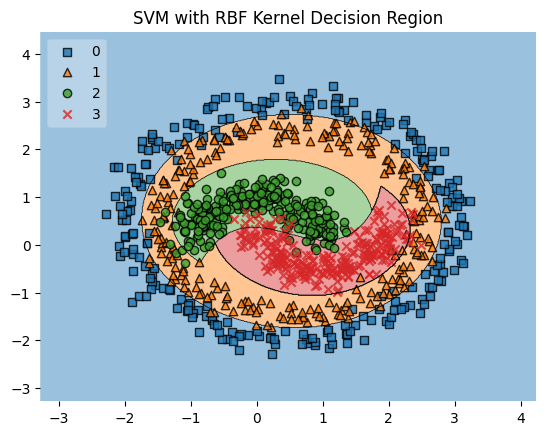

Logistic Regression with Polynomial Features Accuracy: 0.923
SVM with RBF Kernel Accuracy: 0.921


In [109]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(points)

# Train Logistic Regression on the new feature set
logistic_regression_poly = LogisticRegression(max_iter=1000)
logistic_regression_poly.fit(X_poly, labels)

# Plot decision regions for Logistic Regression with polynomial features
feature_values = {i: 0 for i in range(3, X_poly.shape[1])}
feature_width = {i: np.max(X_poly[:, i]) for i in range(3, X_poly.shape[1])}
feature_values[0], feature_width[0] = 1, 1

plot_decision_regions(X_poly, labels, clf=logistic_regression_poly, legend=4, feature_index=(1, 2),
                      filler_feature_values=feature_values, filler_feature_ranges=feature_width)
plt.title("Logistic Regression with Polynomial Features Decision Region")
plt.show()

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(points, labels)
plot_decisions(points, labels, svm_rbf, "SVM with RBF Kernel Decision Region")

y_pred_poly = logistic_regression_poly.predict(X_poly)
y_pred_svm = svm_rbf.predict(points)

accuracy_poly = accuracy_score(labels, y_pred_poly)
accuracy_svm = accuracy_score(labels, y_pred_svm)

print(f"Logistic Regression with Polynomial Features Accuracy: {accuracy_poly:.3f}")
print(f"SVM with RBF Kernel Accuracy: {accuracy_svm:.3f}")

#### Analysis
In summary, 'SVM with an RBF kernel' and 'Logistic Regression with Polynomial Features' are effective for handling non-linearly separable data. The boundary is much more accurately represented in RBF, due to its nonlinearity.